In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

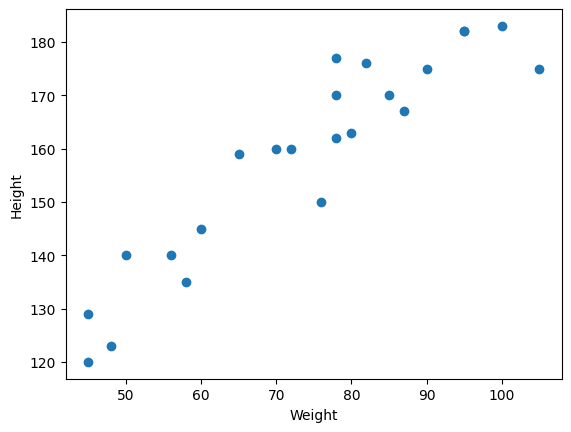

In [4]:
#Visualization
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
#Divide our dataset into independent and dependent feature
X=df[["Weight"]]  #independent features
y=df["Height"]    #Dependent features

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
X.shape,y.shape

((23, 1), (23,))

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [14]:
#standardize the dataset ---only independent data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [18]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

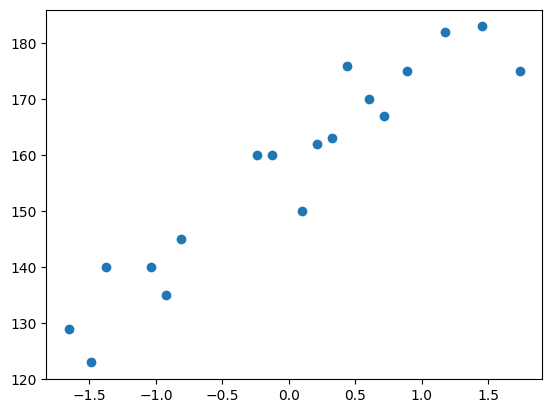

In [20]:
#Now we can see the scaling down of the independent features
plt.scatter(x_train,y_train)

In [21]:
#Train the Simple Linear regression Model

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [26]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("The intercept is ",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
The intercept is  157.5


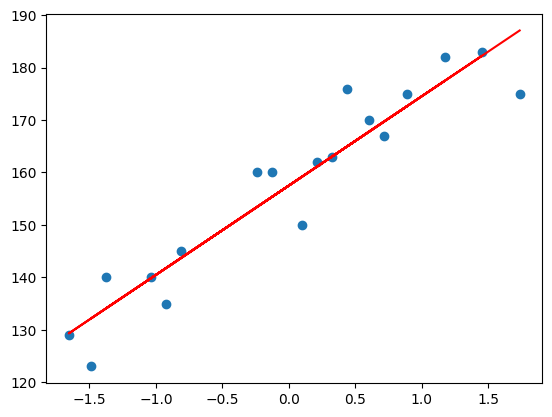

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color="r")

In [34]:
#prediction on test data
y_pred=regressor.predict(x_test)
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

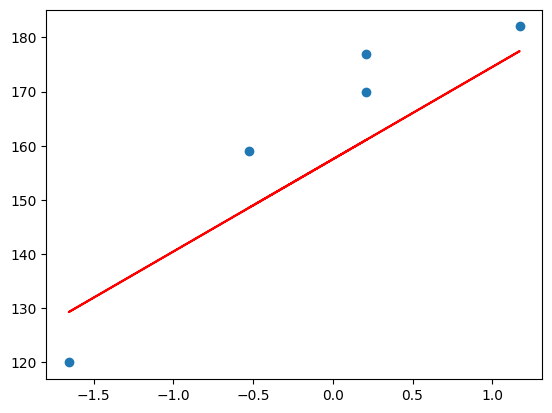

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),"r")

In [36]:
#perfomance metrices
# MSE,MAE,RMSE
#R squared and adjusted R square to check model accuracy


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [38]:
#to check how well our model is performing(R ^2 scquare)
score=r2_score(y_test,y_pred)
print(score)

0.776986986042344


In [39]:
#by using formula we can also calulate adjusted r^2

In [47]:
#new data point weight is given as 80
scaled_weight=scalar.transform([[80]])
scaled_weight

d:\CompleteMLAndNlpBootcamp\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [50]:
print("The prediction of height for weight 80 kgs is ",regressor.predict(scaled_weight))

The prediction of height for weight 80 kgs is  [163.01076266]


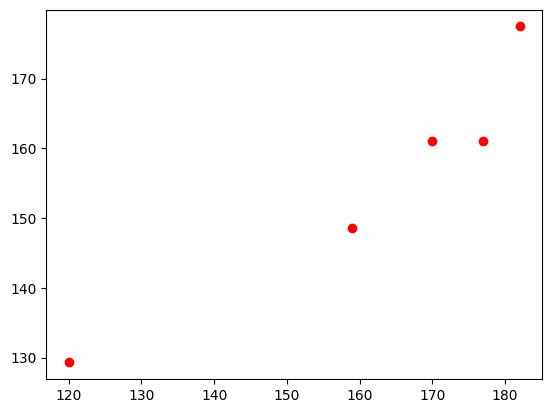

In [52]:
#Assumptions
#Assumption1
plt.scatter(y_test,y_pred,color="r")
#If it it linear then it is good model

<Axes: xlabel='Height', ylabel='Density'>

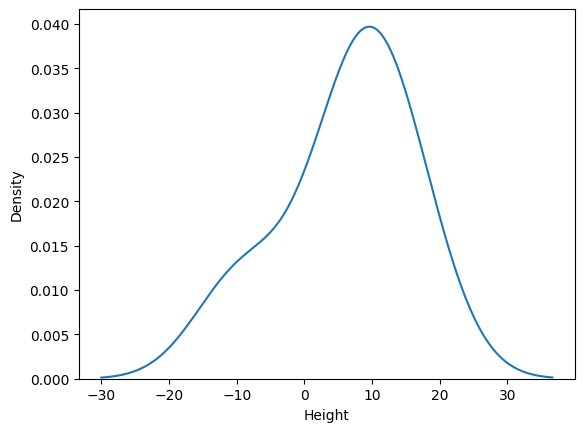

In [53]:
#Assumption2
#residuals
residual=y_test-y_pred
import seaborn as sns
sns.kdeplot(residual)
#if it is showing like normal distribution curve then our model is good


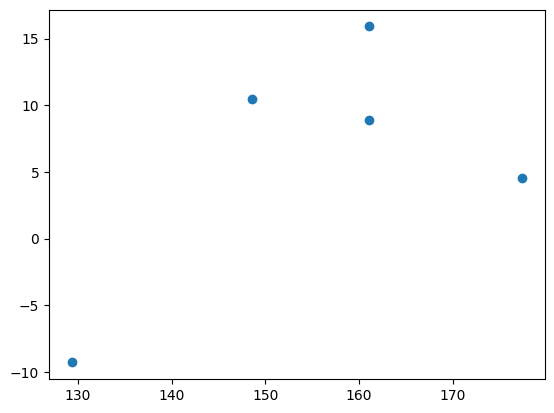

In [54]:
#Assumption3
#scatter plot between y_pred and residuals
#Uniform distribution
plt.scatter(y_pred,residual)